<a href="https://colab.research.google.com/github/potiagov/MIndM/blob/main/LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⬆️ Завантаж свій файл Lab2_data_2.csv


Saving Lab2_data_2.csv to Lab2_data_2.csv

Перші 5 рядків даних:
   0.0  0.36029429141646563
0  1.0             0.519395
1  2.0             0.678485
2  3.0             0.837563
3  4.0             0.996629
4  5.0             1.155684

Використовуються колонки: X = '0.0', Y = '0.36029429141646563'

Поліном ступеня 1:
R² train = 0.619, R² test = 0.634
MSE train = 20.237, MSE test = 22.557


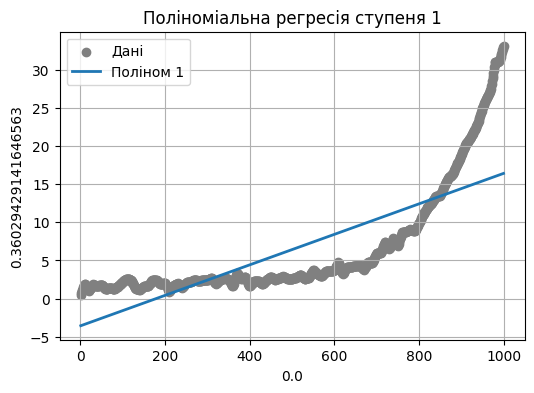


Поліном ступеня 2:
R² train = 0.912, R² test = 0.917
MSE train = 4.696, MSE test = 5.107


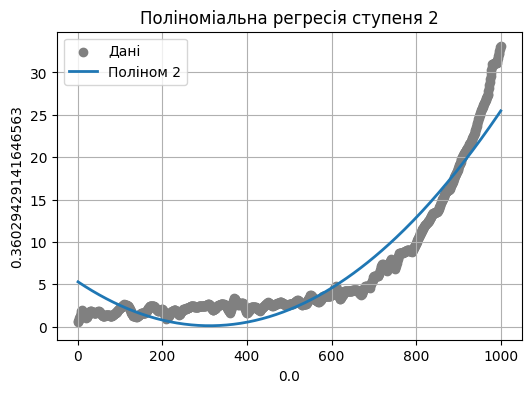


Поліном ступеня 3:
R² train = 0.990, R² test = 0.991
MSE train = 0.515, MSE test = 0.578


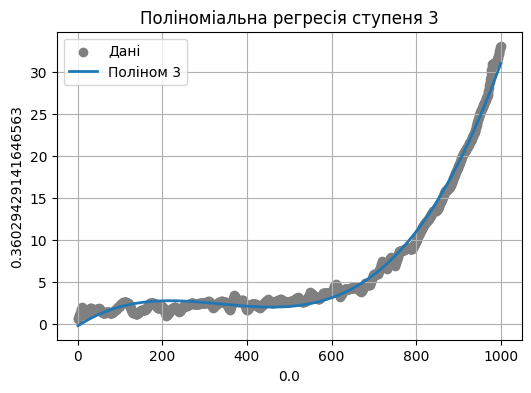


Поліном ступеня 6:
R² train = 0.997, R² test = 0.998
MSE train = 0.139, MSE test = 0.147


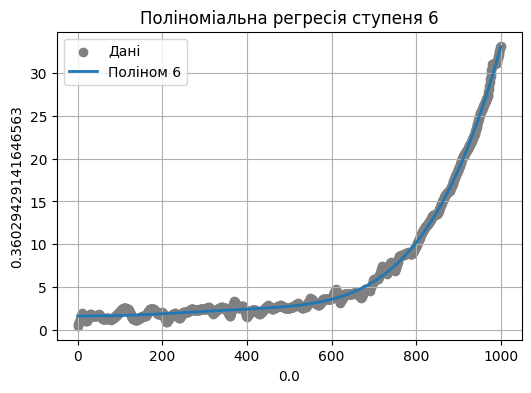


Поліном ступеня 12:
R² train = 0.996, R² test = 0.997
MSE train = 0.187, MSE test = 0.201


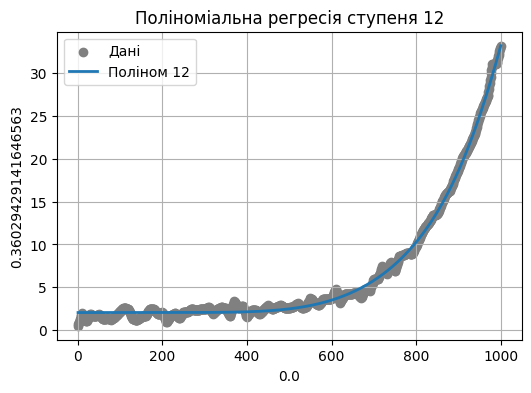

In [3]:
# === Лабораторна робота №2 ===
# Тема: Поліноміальна регресія та перенавчання

# === 1. Імпорт бібліотек ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# === 2. Завантаження CSV-файлу з комп'ютера ===
print("⬆️ Завантаж свій файл Lab2_data_2.csv")
uploaded = files.upload()

# Визначаємо ім'я файлу
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

print("\nПерші 5 рядків даних:")
print(data.head())

# === 3. Автоматичне визначення колонок ===
# Знайдемо перші два числові стовпці (припускаємо, що це X і Y)
num_cols = data.select_dtypes(include=[np.number]).columns
if len(num_cols) < 2:
    raise ValueError("У файлі повинно бути принаймні два числові стовпці!")

X = data[num_cols[0]].values.reshape(-1, 1)
y = data[num_cols[1]].values

print(f"\nВикористовуються колонки: X = '{num_cols[0]}', Y = '{num_cols[1]}'")

# === 4. Розбиття на навчальні й тестові дані ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === 5. Функція для побудови моделі та оцінки ===
def evaluate_polynomial(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\nПоліном ступеня {degree}:")
    print(f"R² train = {train_r2:.3f}, R² test = {test_r2:.3f}")
    print(f"MSE train = {train_mse:.3f}, MSE test = {test_mse:.3f}")

    # Побудова графіка
    X_plot = np.linspace(min(X), max(X), 300).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, color='gray', label='Дані')
    plt.plot(X_plot, y_plot, label=f'Поліном {degree}', linewidth=2)
    plt.title(f'Поліноміальна регресія ступеня {degree}')
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.legend()
    plt.grid(True)
    plt.show()

# === 6. Лінійна модель та поліноми ===
evaluate_polynomial(1)   # Лінійна
for deg in [2, 3, 6, 12]:
    evaluate_polynomial(deg)
